In [1]:
# 2018-03-15
# A. Pendleton
# Processing Kallisto Transcript Assessments

In [2]:
#this uses iPython magic to make plots appear inline
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import subprocess
import sys
import numpy as np
import matplotlib.patches as patches
import gzip
import fileinput
import glob
from scipy import stats
import re
from matplotlib_venn import venn3, venn3_circles
from collections import OrderedDict


def count_lines(f):
    lineCount = 0
    with open(f, 'r') as f:
        for line in f:
            lineCount += 1
        return lineCount
def runCMD(cmd):
    val = subprocess.Popen(cmd, shell=True).wait()
    if val == 0:
        pass
    else:
        print ('command failed')
        print (cmd)
        sys.exit(1)
# TO REMOVE TOP AND RIGHT AXIS OF PLOTS
def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

In [3]:
def get_sample_info():
    #Reading in the RNA-Seq library IDs
    sampleInfo = '/home/ampend/links/kidd-lab/ampend-projects/Novel_Sequence_Analysis/rna-seq/SampleInfoTable.txt'
    sampleDict, tissueDict, samples = {}, {}, []

    for line in open(sampleInfo, 'r'):
        if 'Bio' in line: #skips header
            continue
        line=line.rstrip().split()
        ID = line[4]
        #Rename some tissues to shorter name
        tissue = line[5]
        
        if 'SmoothMuscle' in tissue:
            shortTissue = 'SM'
        if 'Unidentified' in tissue:
            shortTissue = 'NA'
        if 'Blood' in tissue:
            shortTissue = 'BL'
        if 'Brain' in tissue:
            shortTissue = 'BR'
        if 'Heart' in tissue:
            shortTissue = 'HT'
        if 'Ovary' in tissue:
            shortTissue = 'OV'
        if 'Skin' in tissue:
            shortTissue = 'SK'
        if 'Kidney' in tissue:
            shortTissue = 'KD'
        if 'Testis' in tissue:
            shortTissue = 'TS'
        if 'Liver' in tissue:
            shortTissue = 'LV'
        if 'Lung' in tissue:
            shortTissue = 'LG'
        sampleDict[ID] = []
        sampleDict[ID].append(tissue)
        sampleDict[ID].append(shortTissue)
        samples.append(ID)
        

        
        if tissue not in tissueDict.keys():
            tissueDict[tissue] = []
        tissueDict[tissue].append(ID)

    print('%i samples added to a sample array from the following tissues:\n' % len(samples))

    genomes = ['zoey-2.3','canFam3.1-noY']

    for tissue in tissueDict.keys():
        print(tissue)

    return sampleDict, tissueDict, genomes



## Reading in Library/Sample Information

In [4]:
#Reading in library information
sampleDict, tissueDict, genomes = get_sample_info()

samples=[]
for key in sampleDict.keys():
    samples.append(key)

42 samples added to a sample array from the following tissues:

Ovary
Blood
Unidentified
Kidney
Skin
Brain
SmoothMuscle
Heart
Lung
Testis
Liver


## Reading in Kallisto Results

In [5]:
# function to count elements within given range
def countInRange(arr, n, x, y):
    # initialize result
    count = 0 
    for i in range(n):
        # check if element is in range
        if (arr[i] >= x and arr[i] < y):
            count += 1
    return count
def plot_sample_tpms(arr,sampleID,plotFile):
    #PLOT
    fig = plt.figure(figsize=(12, 8)) #Set up subplots for below distributions
    ax = fig.add_subplot(111)
    _ = plt.hist(tpms, 1500, facecolor='green', alpha=0.75)
    plt.title('Zoey Transcript TPMs - Sample %s' % sample)
    plt.xlabel('TPM')
    plt.ylabel('Count')
    plt.xlim(1,10000)
    plt.ylim(0,200)
    simpleaxis(ax)
    plt.tight_layout()
    plt.savefig(plotFile,transparent=True) #save    
    
    #Print out stats
    print('\n####Sample -- %s' % sample)
    print('Minimum TPM = ', min(tpms))
    print('Maximum TPM = ', max(tpms))
    print('Average TPM = ', np.mean(tpms))
    print('Median TPM = ', np.median(tpms))

def get_size_ranges(arr):
    count = countInRange(tpms, len(tpms), 0, .9999)
    print('%i less than 1.0 tpm' % count)
    
    count = countInRange(tpms, len(tpms), 1, 10)
    print('%i between 1-10 tpm' % count)
    
    count = countInRange(tpms, len(tpms), 10, 50)
    print('%i less than 10-50 tpm' % count)
    
    count = countInRange(tpms, len(tpms), 50, 100)
    print('%i between 50-100 tpm' % count)
    
    count = countInRange(tpms, len(tpms), 100, 150)
    print('%i between 100-150 tpm' % count)
    
    count = countInRange(tpms, len(tpms), 150, 200)
    print('%i between 150-200 tpm' % count)
    
    count = countInRange(tpms, len(tpms), 200, 250)
    print('%i between 200-250 tpm' % count)
    
    count = countInRange(tpms, len(tpms), 250, 300)
    print('%i between 250-300 tpm' % count)
    
    count = countInRange(tpms, len(tpms), 300, 350)
    print('%i between 300-350 tpm' % count)
    
    count = countInRange(tpms, len(tpms), 350, 1000000000)
    print('%i over 350 tpm' % count)

In [13]:
kalDir = '/home/ampend/links/kidd-lab/ampend-projects/Zoey_Genome_Project/rna-seq/Trinity_RNA-Seq_Analysis/trinity_alignments/zoey-2.3/Kalisto/'
resultsDir = kalDir + 'results/'

samplesProcessed = []
for files in glob.glob(resultsDir + 'SRR*'):
    samplesProcessed.append(files.replace(resultsDir,''))
    
print('%i samples processed through Kallisto' % len(samplesProcessed))


42 samples processed through Kallisto


SRR388764

####Sample -- SRR388764
Minimum TPM =  0.0
Maximum TPM =  77686.9
Average TPM =  1.10637830818
Median TPM =  0.0
808434 less than 1.0 tpm
88698 between 1-10 tpm
5537 less than 10-50 tpm
556 between 50-100 tpm
198 between 100-150 tpm
102 between 150-200 tpm
55 between 200-250 tpm
34 between 250-300 tpm
30 between 300-350 tpm
205 over 350 tpm
SRR388740

####Sample -- SRR388740
Minimum TPM =  0.0
Maximum TPM =  139001.0
Average TPM =  1.10637773419
Median TPM =  0.0
824886 less than 1.0 tpm
71014 between 1-10 tpm
6513 less than 10-50 tpm
758 between 50-100 tpm
246 between 100-150 tpm
103 between 150-200 tpm
79 between 200-250 tpm
49 between 250-300 tpm
33 between 300-350 tpm
167 over 350 tpm
SRR388754

####Sample -- SRR388754
Minimum TPM =  0.0
Maximum TPM =  29566.2
Average TPM =  1.10637822626
Median TPM =  0.0
823873 less than 1.0 tpm
71576 between 1-10 tpm
6775 less than 10-50 tpm
809 between 50-100 tpm
270 between 100-150 tpm
109 between 150-200 tpm
79 between 200-250 tpm


/sw/lsa/centos7/python-anaconda-arc-connect/created-20170421/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)



####Sample -- SRR388749
Minimum TPM =  0.0
Maximum TPM =  230503.0
Average TPM =  1.10637768804
Median TPM =  0.0
849120 less than 1.0 tpm
50849 between 1-10 tpm
3017 less than 10-50 tpm
368 between 50-100 tpm
108 between 100-150 tpm
77 between 150-200 tpm
65 between 200-250 tpm
32 between 250-300 tpm
32 between 300-350 tpm
181 over 350 tpm
SRR536884

####Sample -- SRR536884
Minimum TPM =  0.0
Maximum TPM =  65204.3
Average TPM =  1.10637815427
Median TPM =  0.0
829477 less than 1.0 tpm
68838 between 1-10 tpm
4185 less than 10-50 tpm
592 between 50-100 tpm
225 between 100-150 tpm
107 between 150-200 tpm
52 between 200-250 tpm
46 between 250-300 tpm
34 between 300-350 tpm
291 over 350 tpm
SRR388762

####Sample -- SRR388762
Minimum TPM =  0.0
Maximum TPM =  207541.0
Average TPM =  1.10637886594
Median TPM =  0.0
872564 less than 1.0 tpm
27529 between 1-10 tpm
2806 less than 10-50 tpm
403 between 50-100 tpm
127 between 100-150 tpm
59 between 150-200 tpm
50 between 200-250 tpm
41 between 

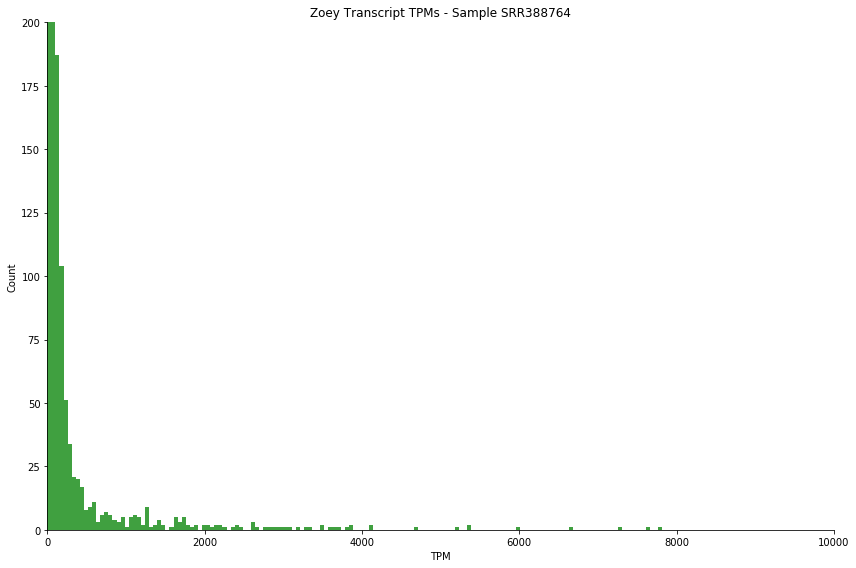

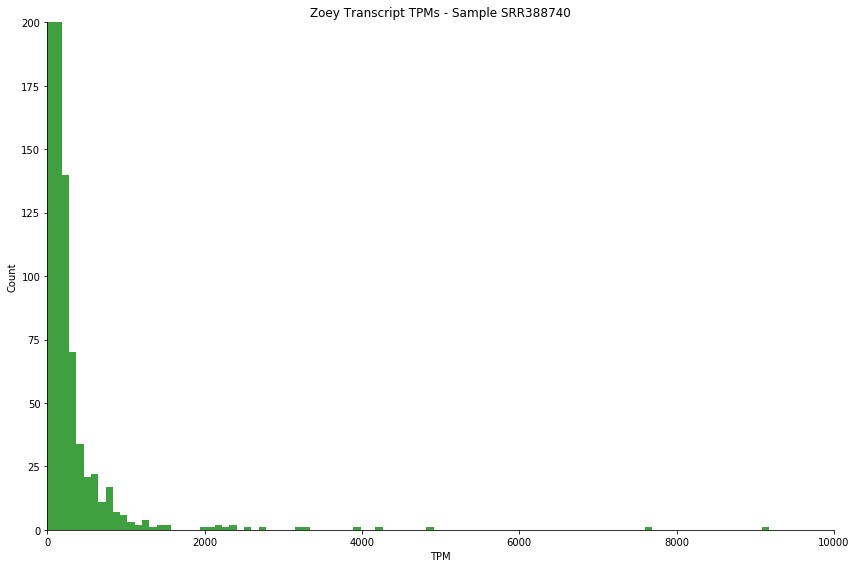

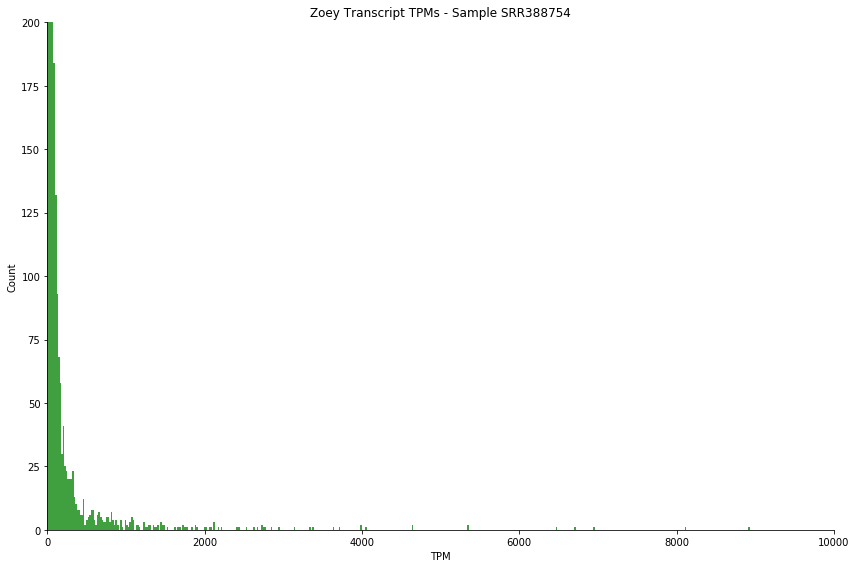

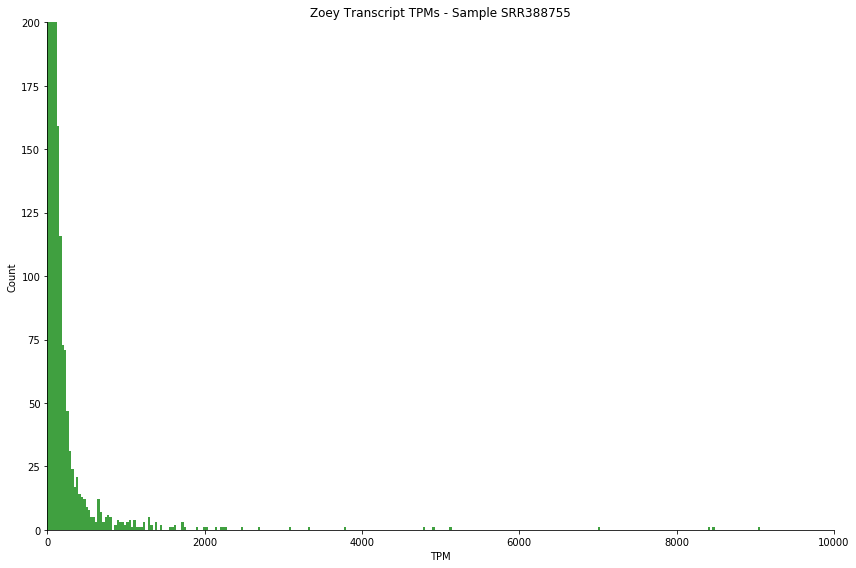

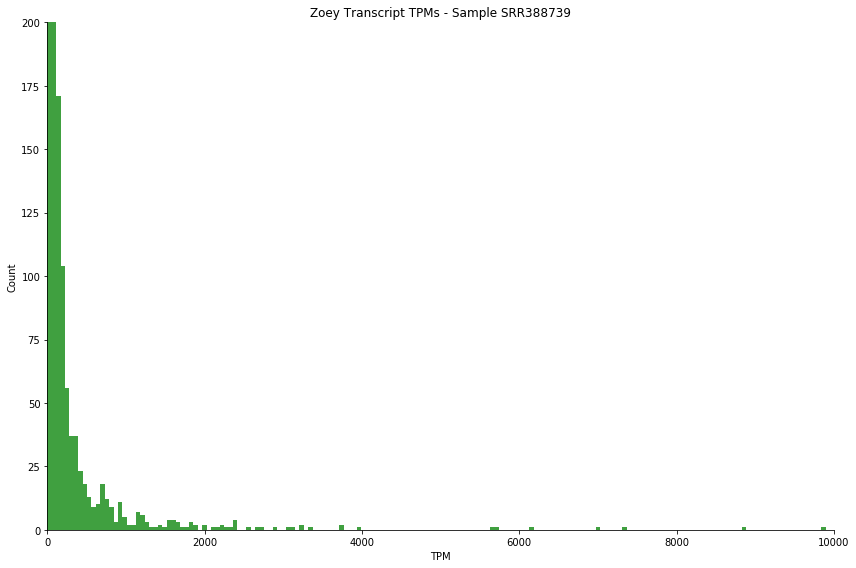

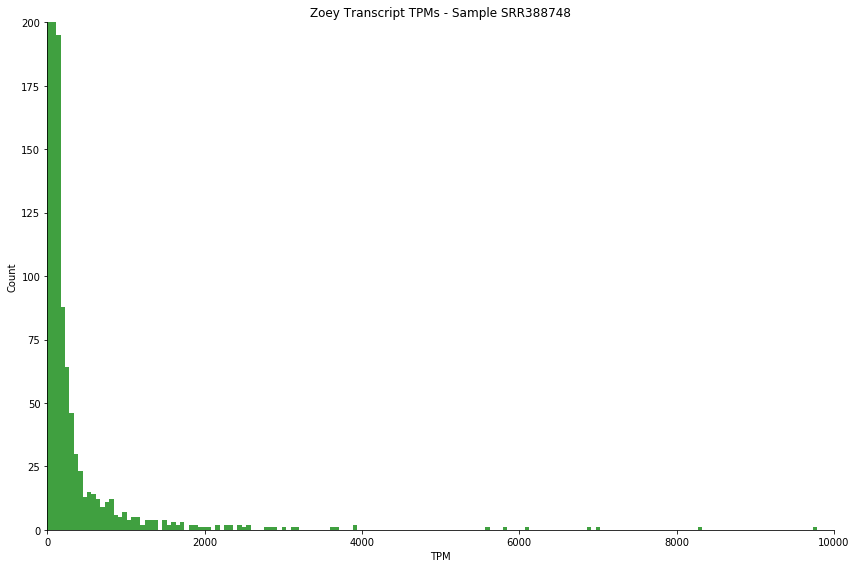

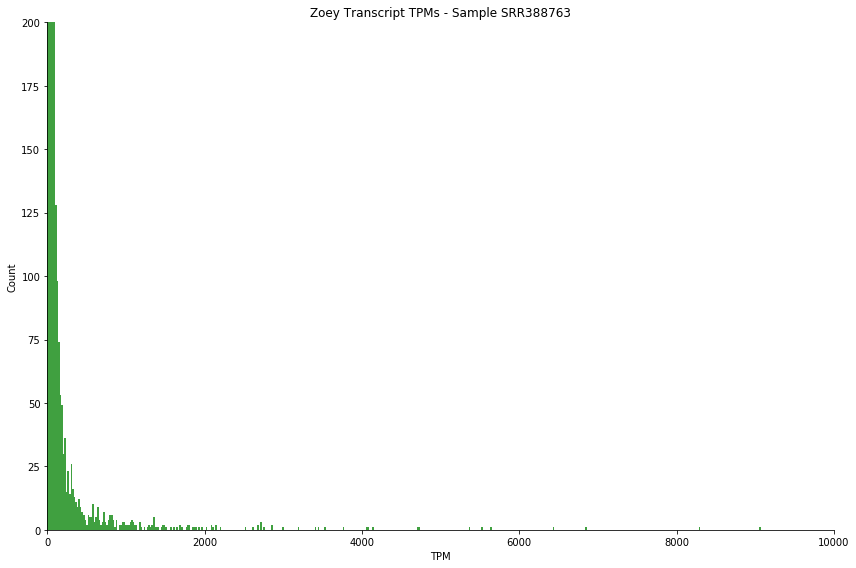

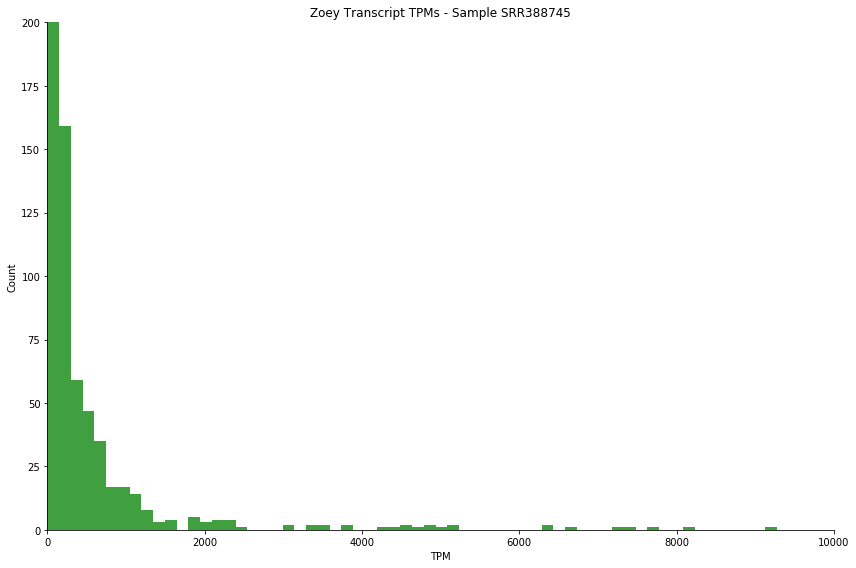

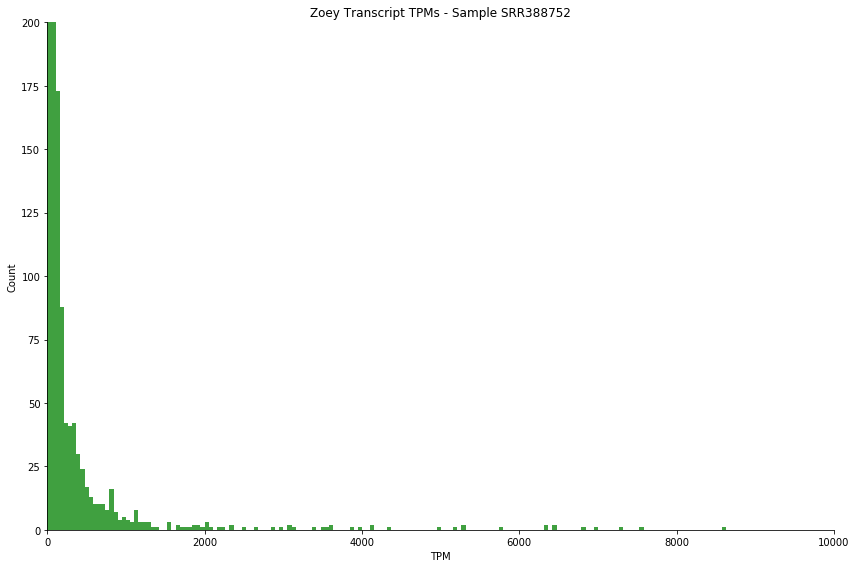

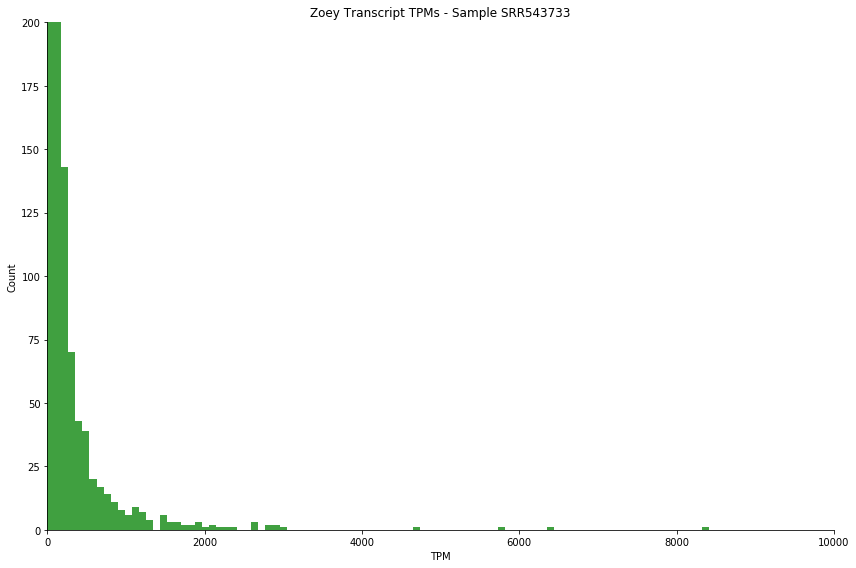

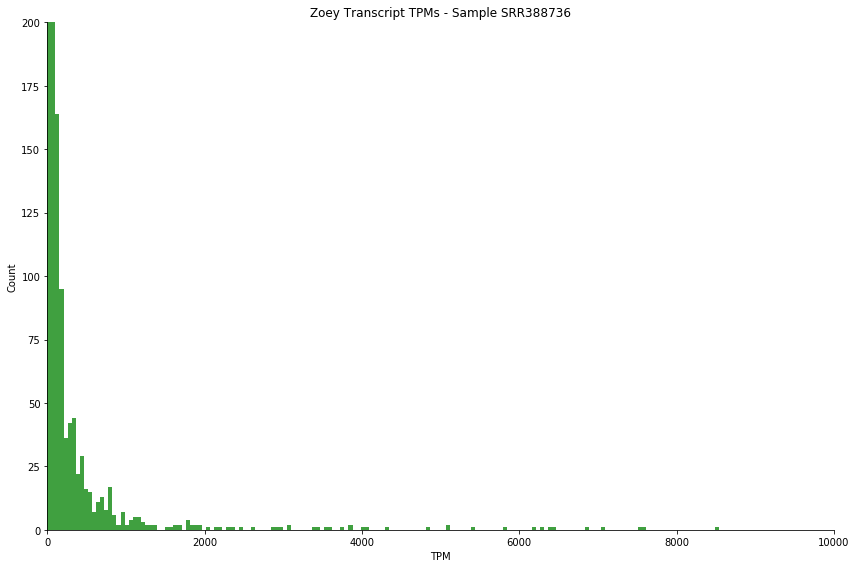

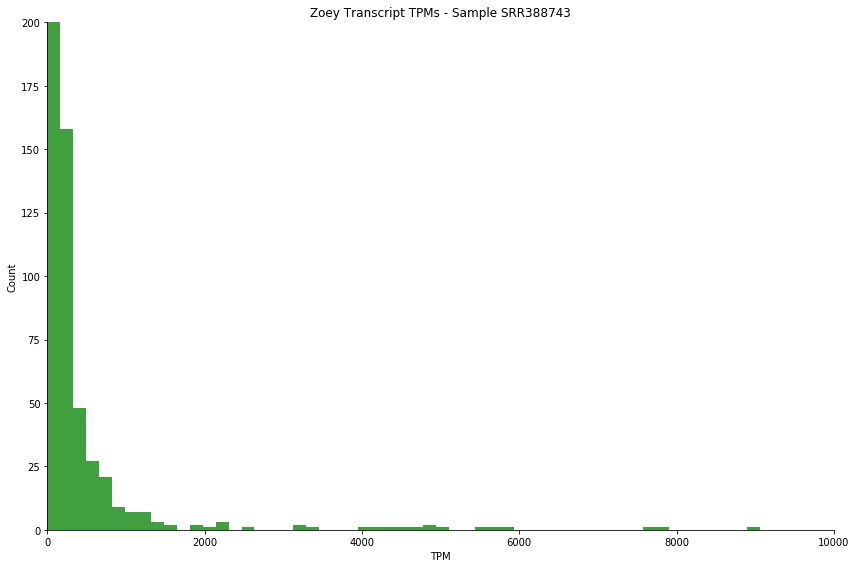

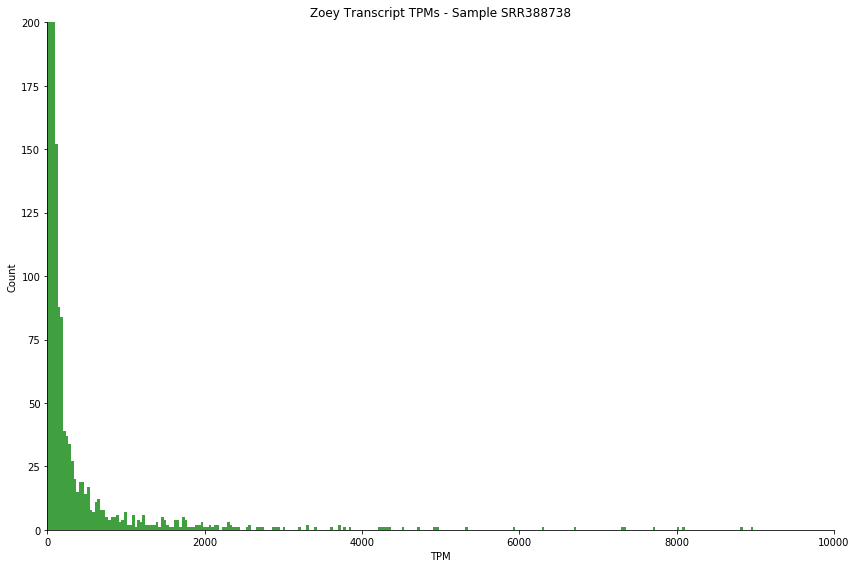

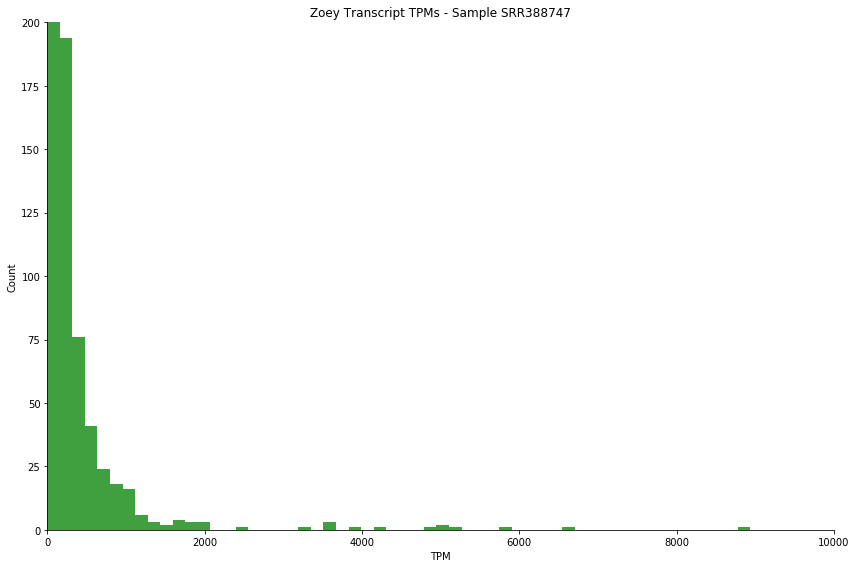

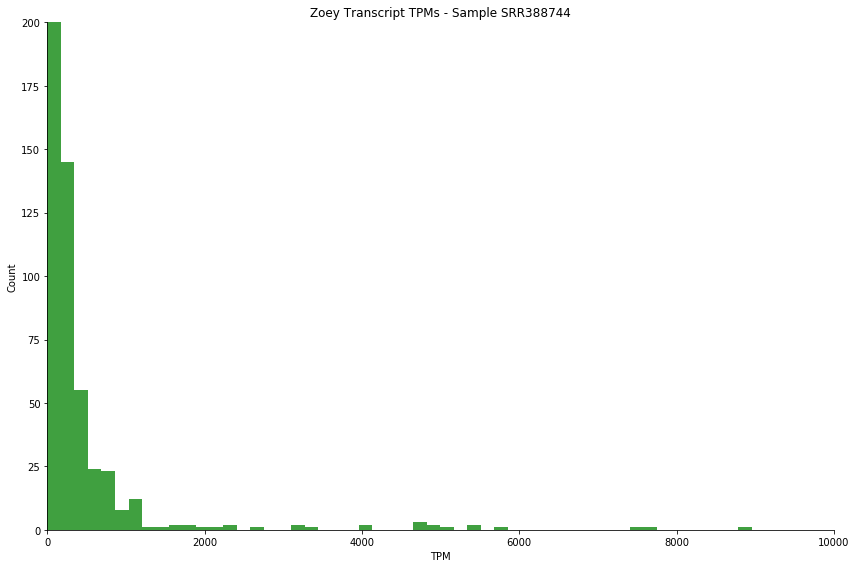

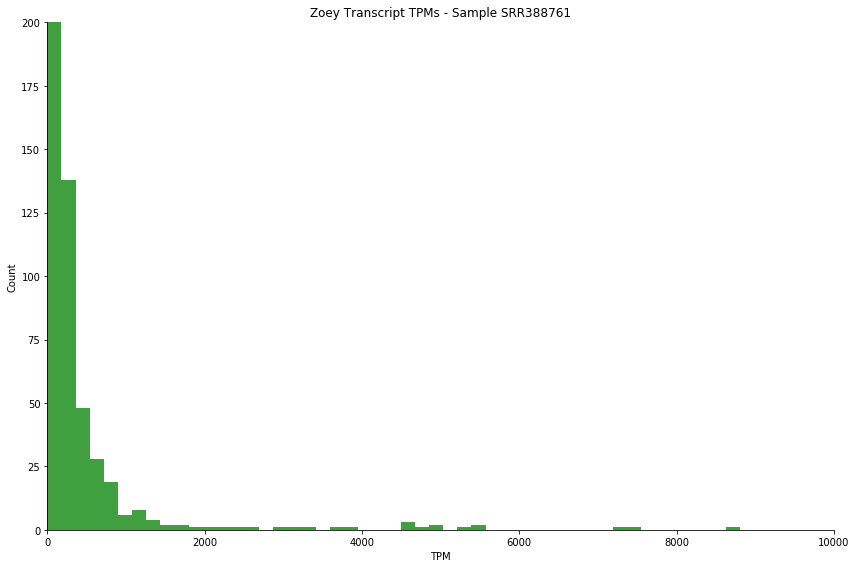

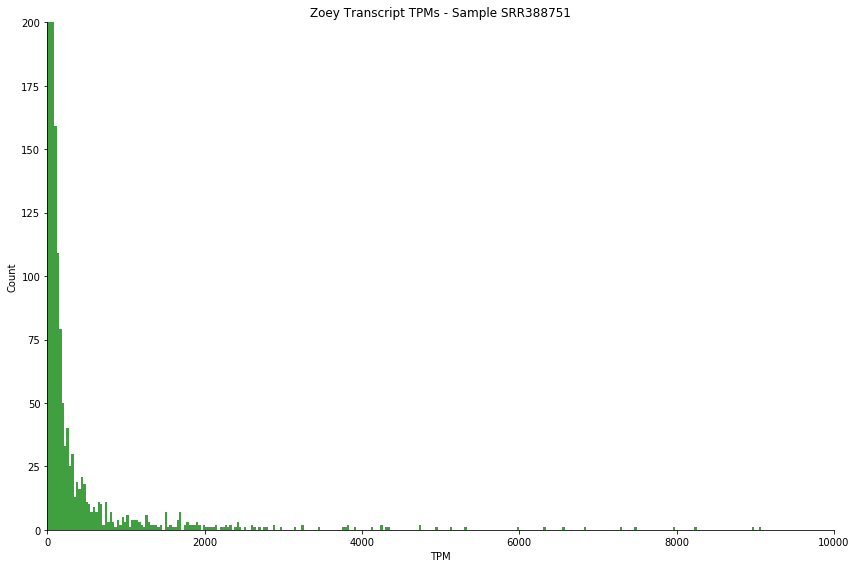

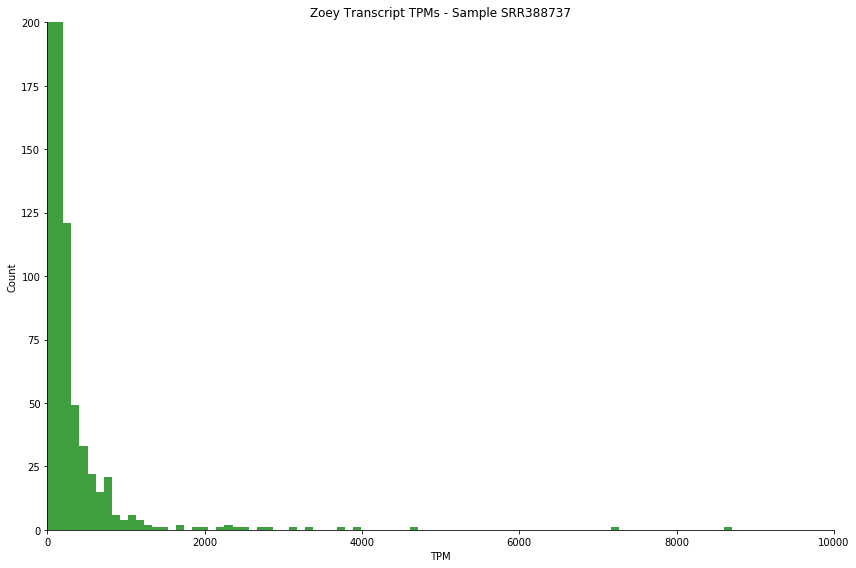

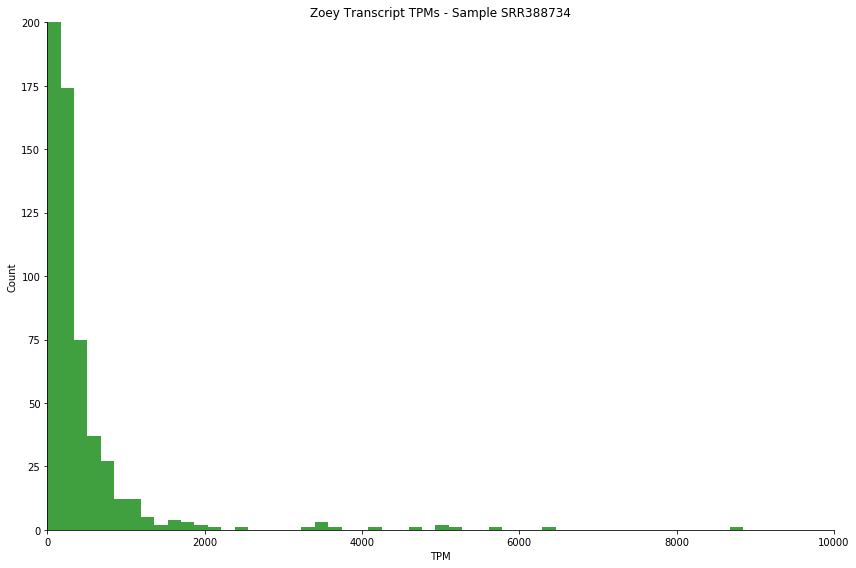

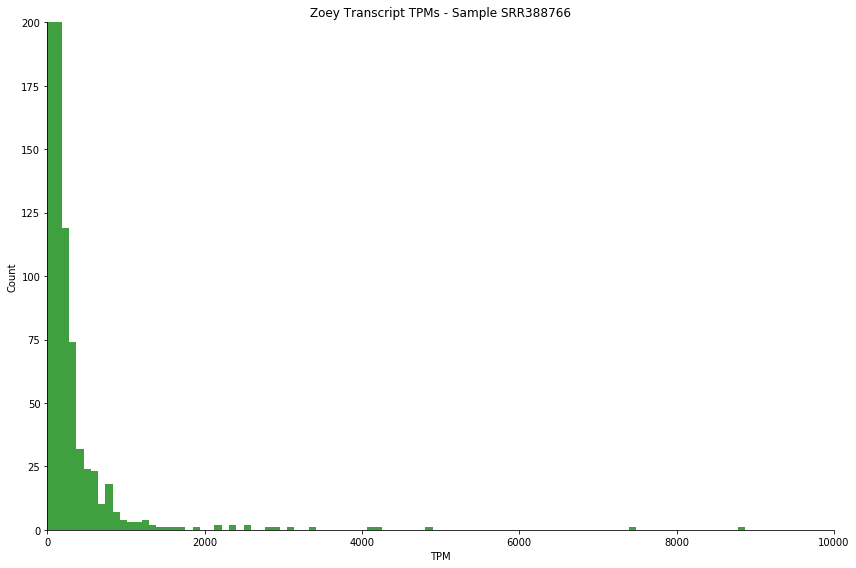

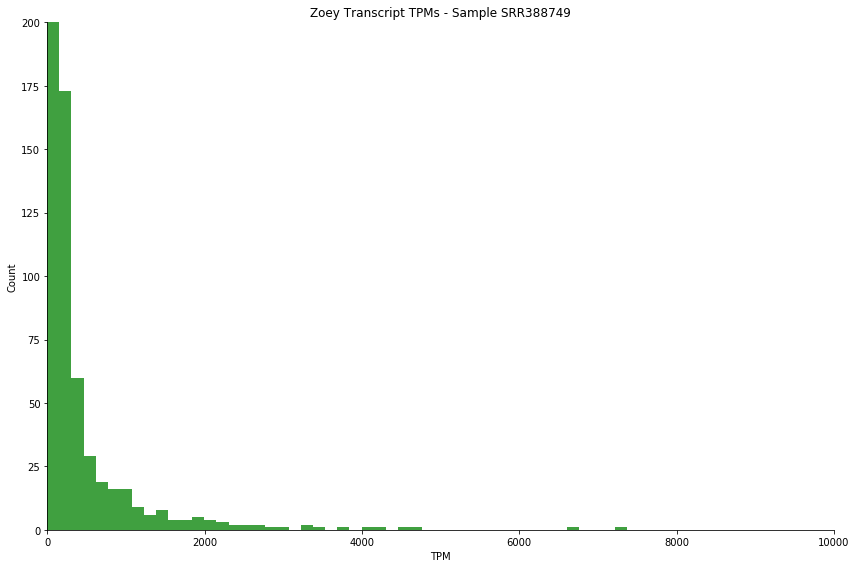

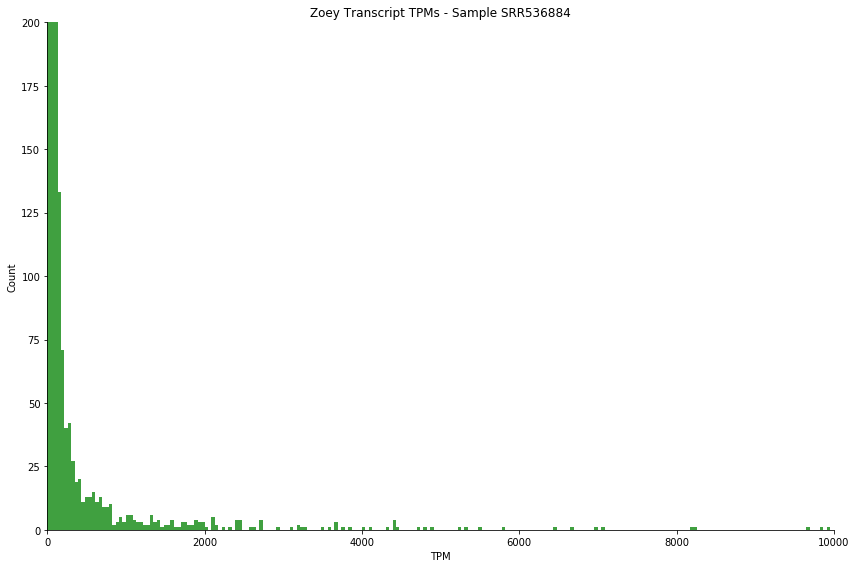

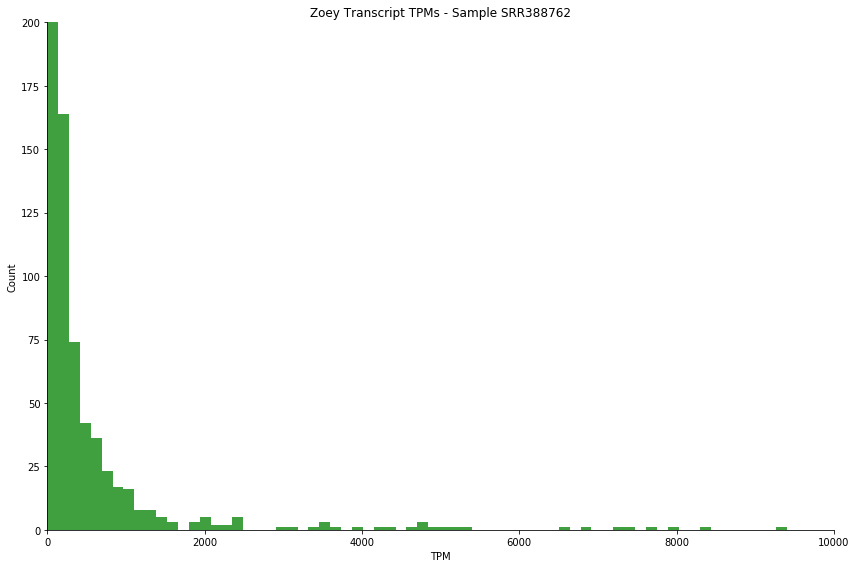

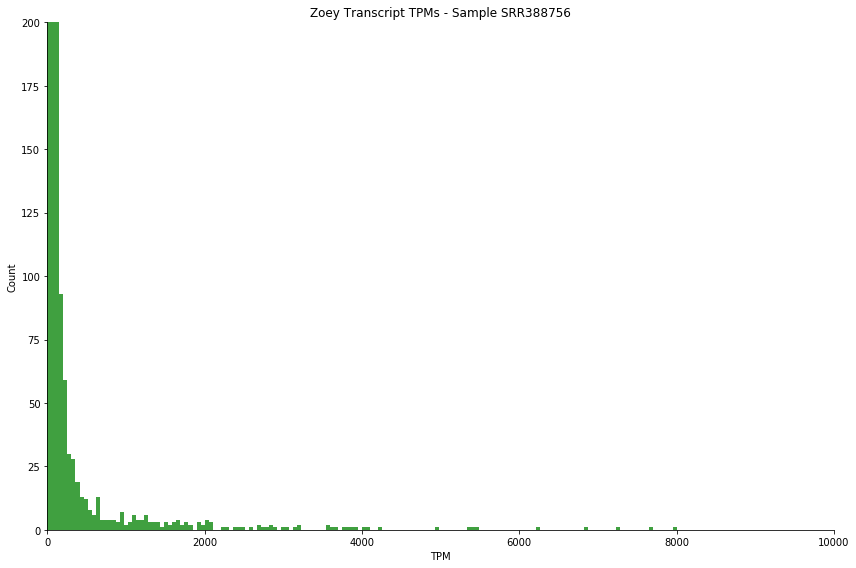

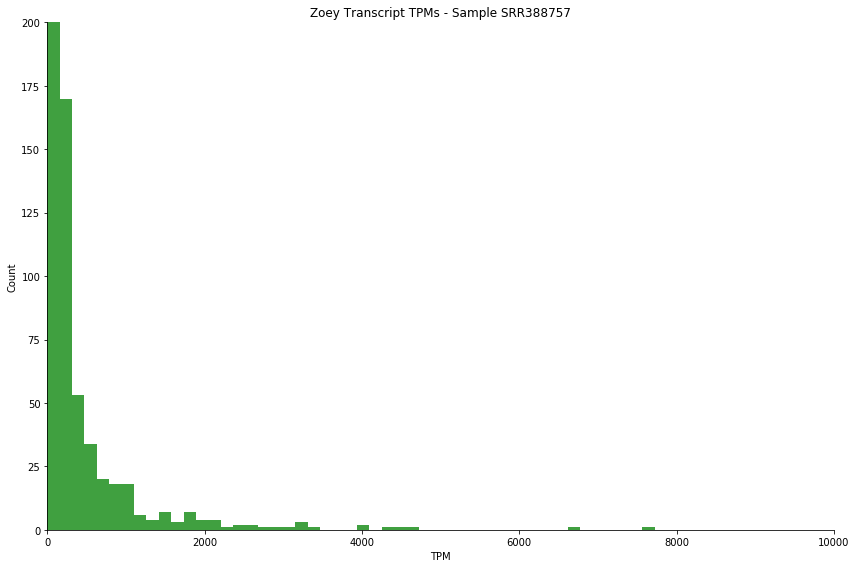

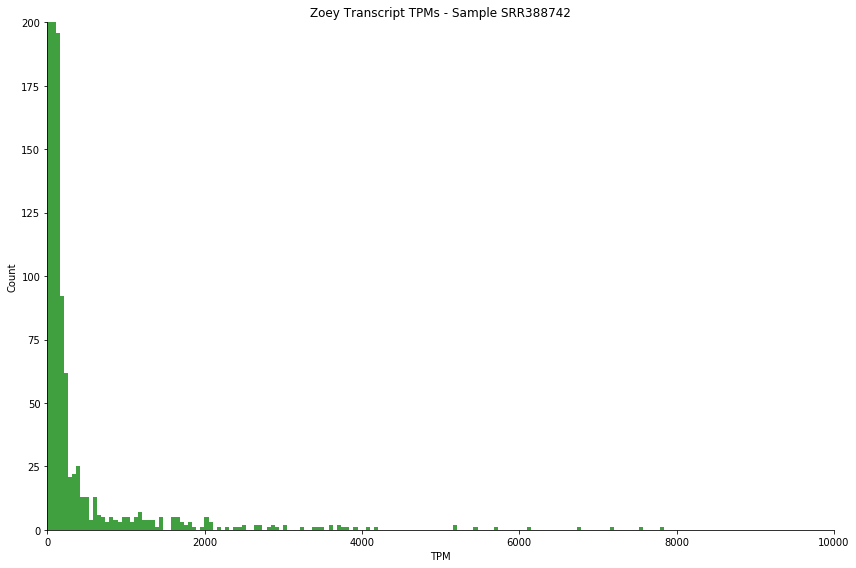

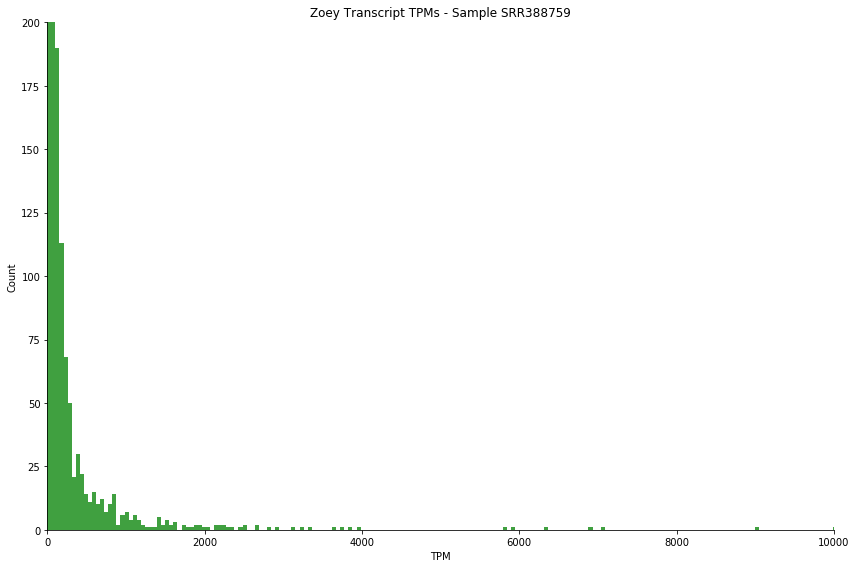

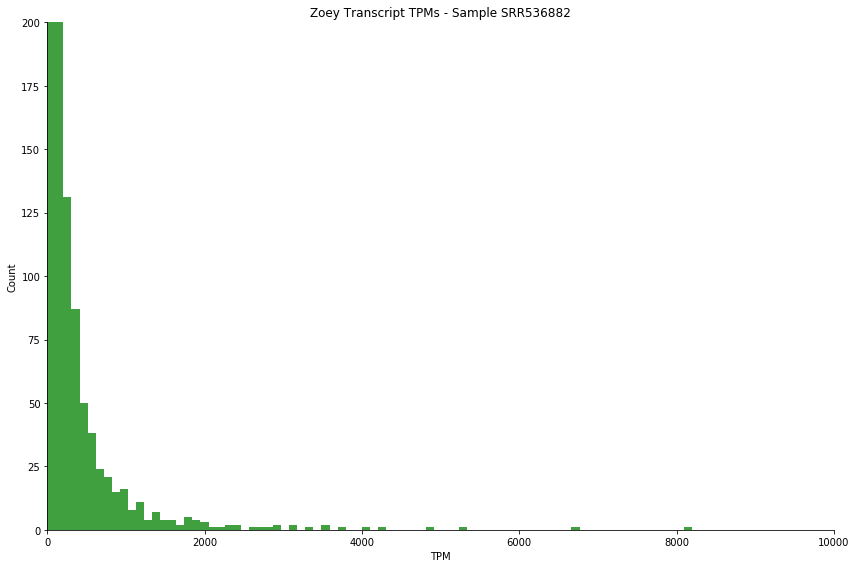

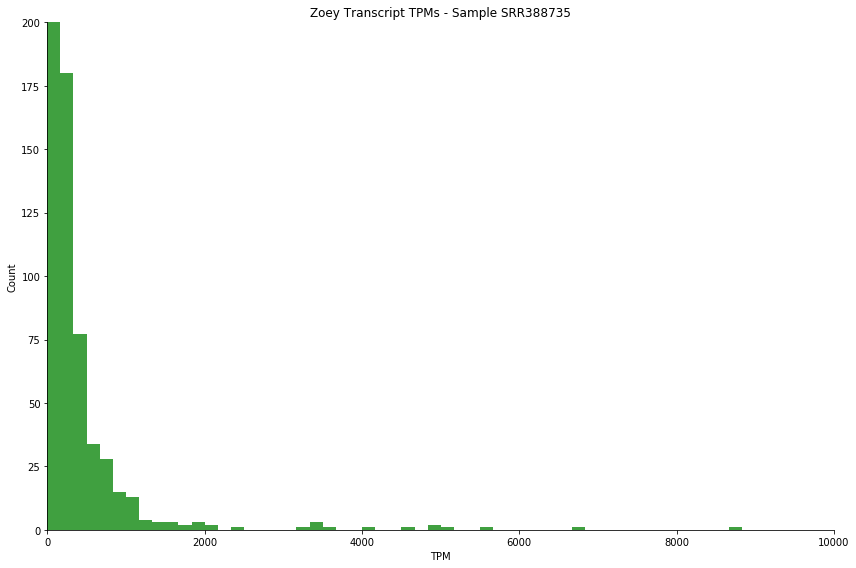

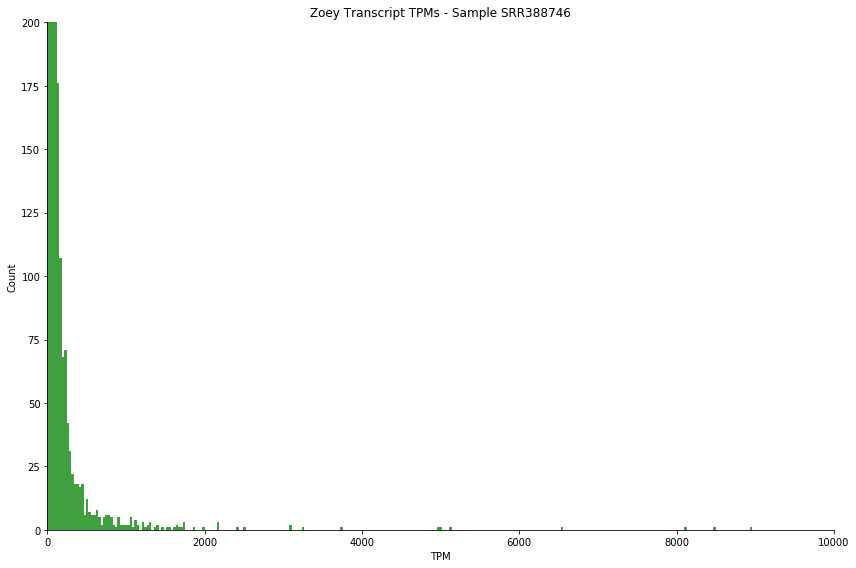

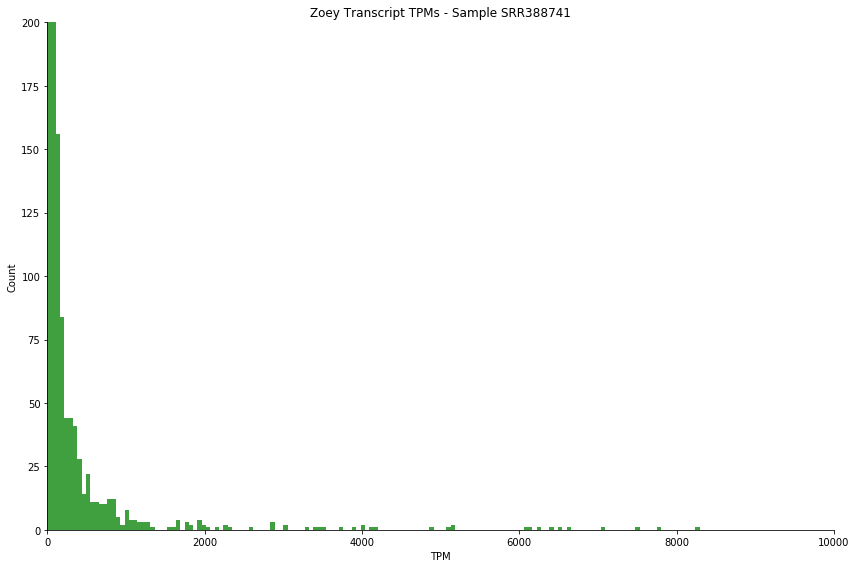

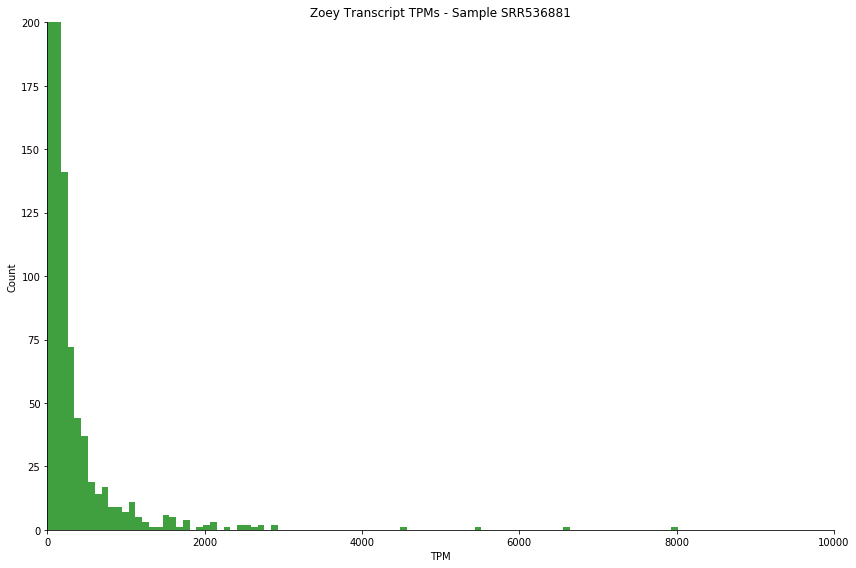

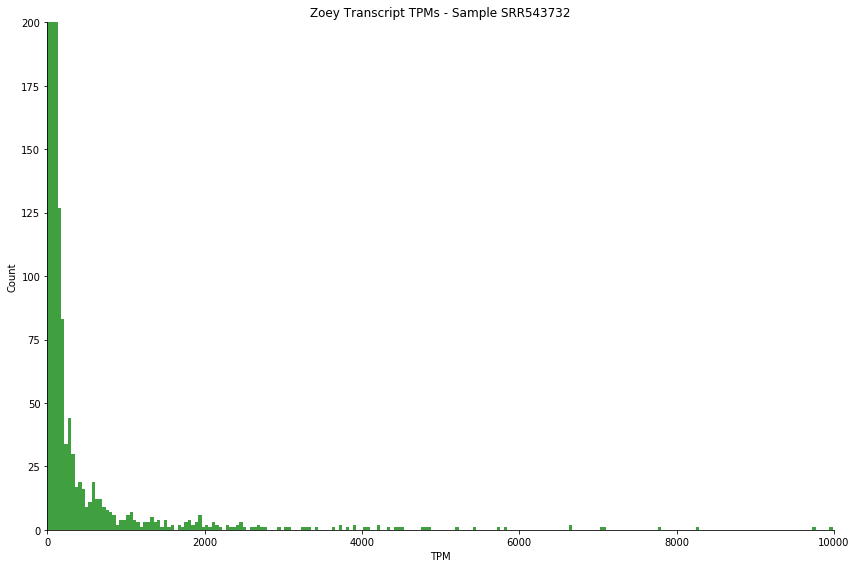

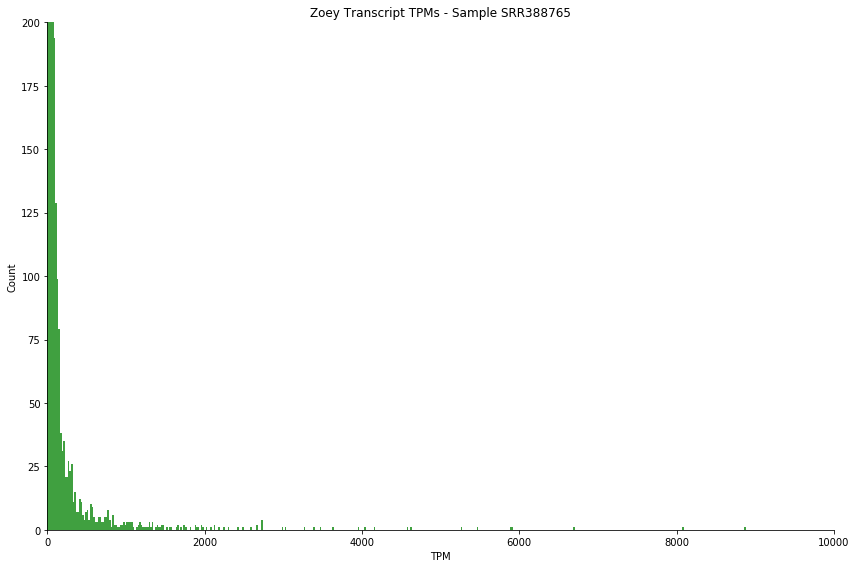

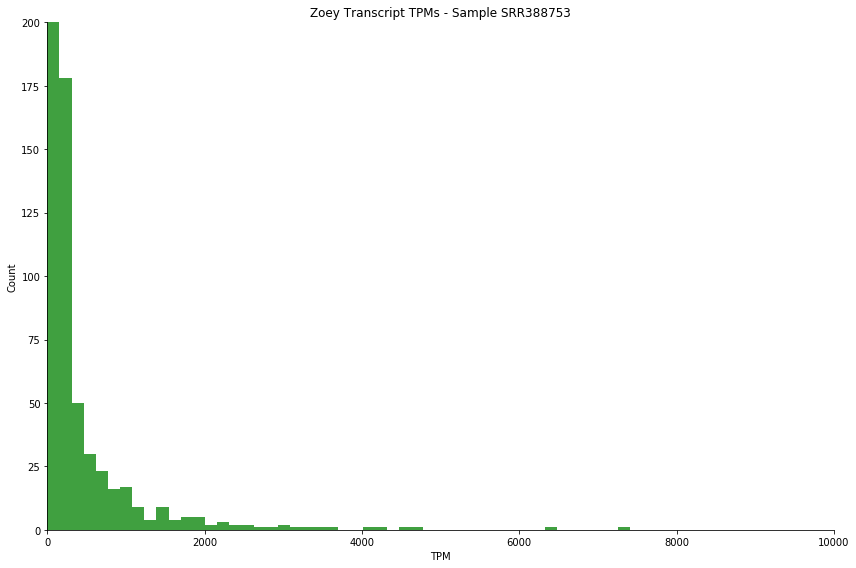

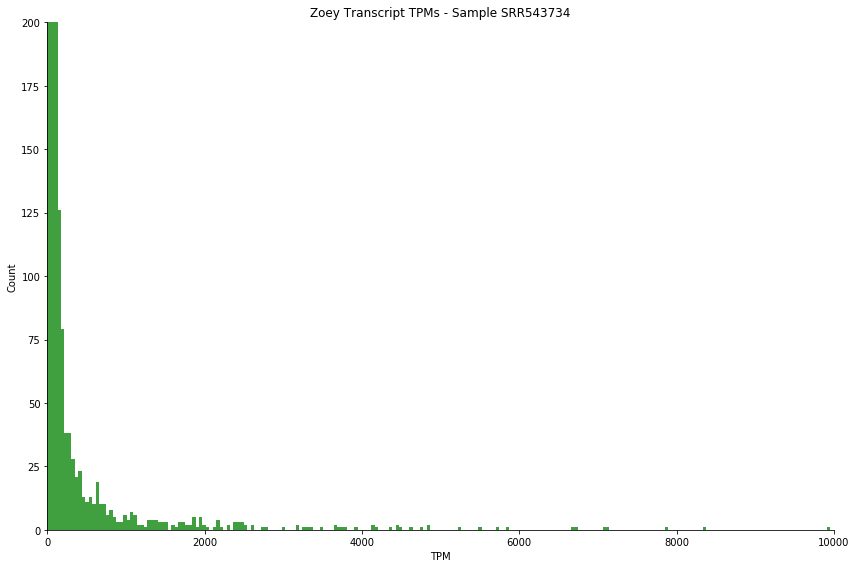

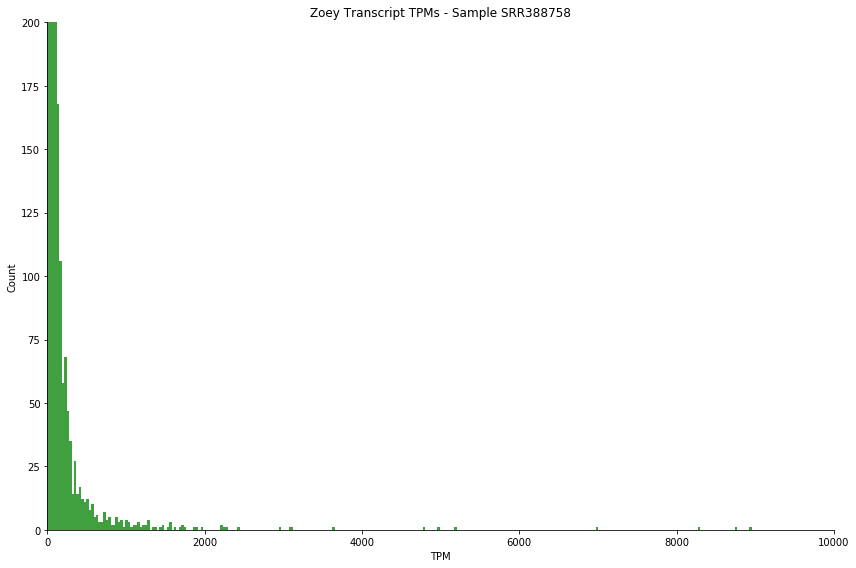

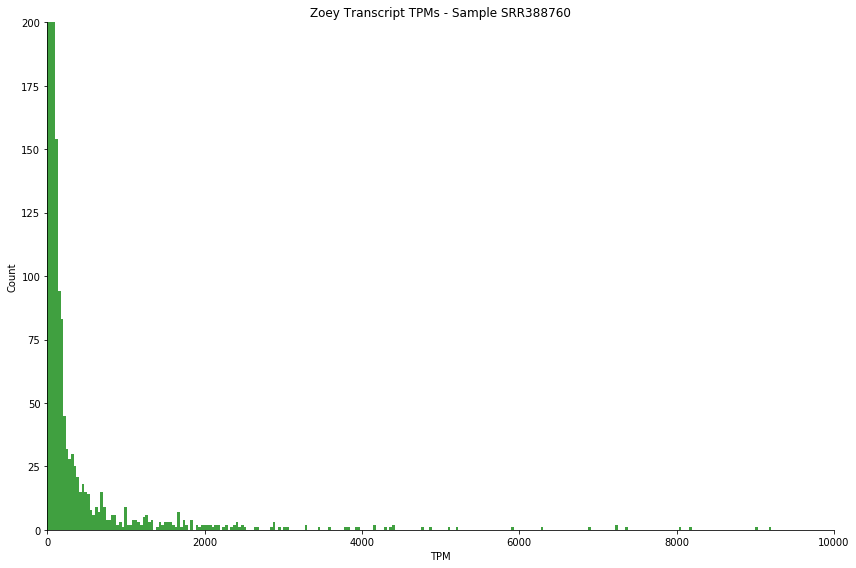

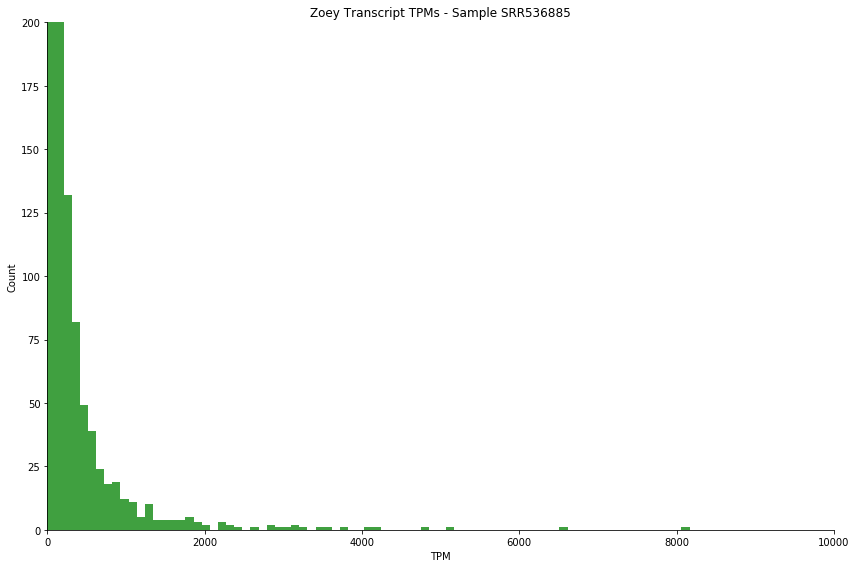

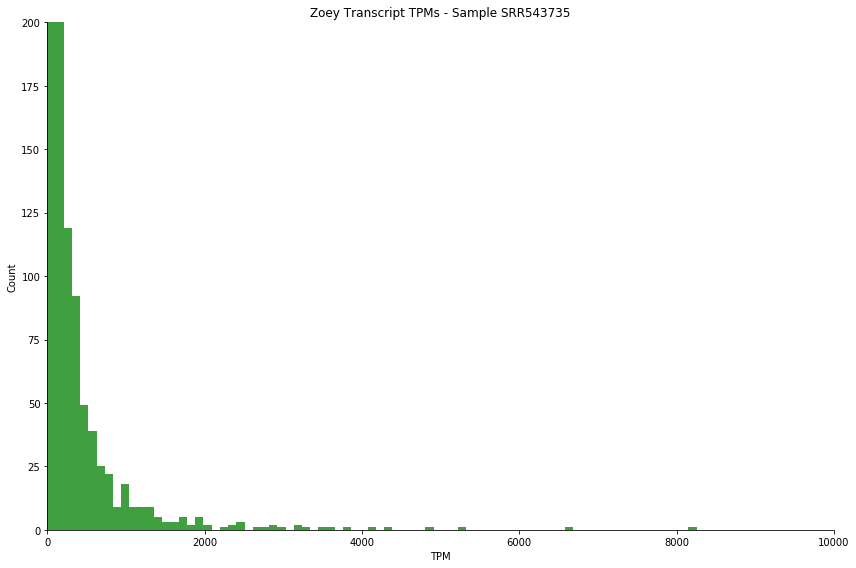

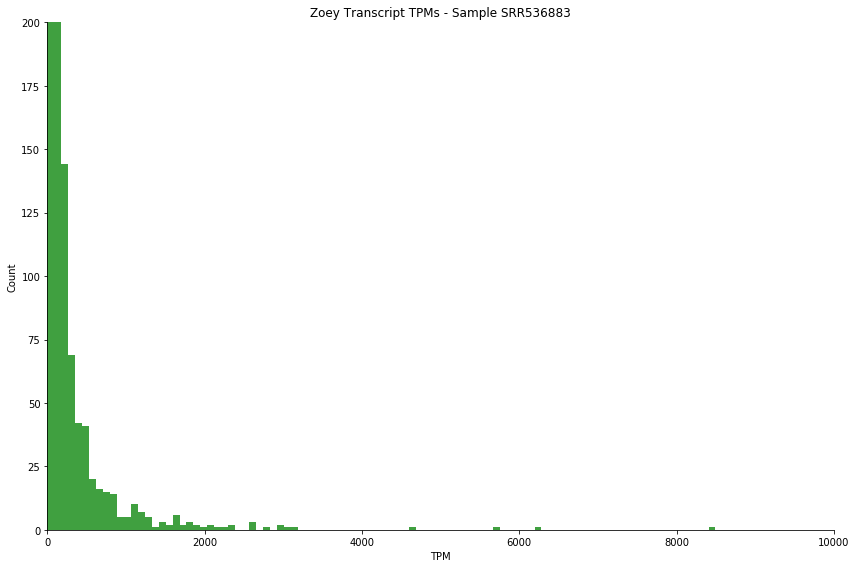

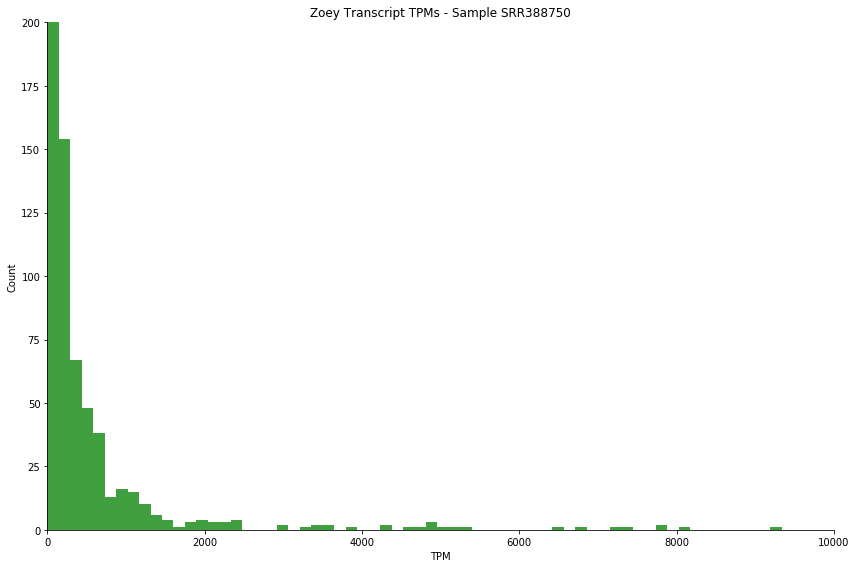

In [15]:
#CALCULATE STATS AND DRAW PLOTS PER SAMPLE
sampleCount = 0

tpmDict = {}

plotDir = resultsDir + '../plots/'
for sample in samplesProcessed:
    tpms = [] #clear per sample
    sampleCount += 1
    print(sample)
    
    inFile = resultsDir + sample + '/' + 'abundance.tsv'
    for line in open(inFile,'r'):
        if 'target_id' in line:
            continue
        line=line.rstrip().split('\t')
        transcript = line[0]
        tpm = float(line[4])
        #if only the first sample, create key for the gene
        if sampleCount == 1:
            #0 = library expression TPMs, Pass/Fail CD-Hit
            tpmDict[transcript] = [[],'Fail','','','','']
        #If expressed at tpm > 1, add to dictionary
        if tpm > 1.0:
            tpmDict[transcript][0].append(tpm) #add TPM to total dictionary      
        tpms.append(tpm) #add TPM to per saple array for stats (below)
    
    #Plot the TPM distribution
    plotFile = plotDir + sample + '_TPM_Histogram.png'
    plot_sample_tpms(tpms,sample,plotFile)
    
    get_size_ranges(tpms)
    
    """if sampleCount ==2:
        break"""


### Identify how many transcripts are NOT expressed in at least one library with TPM >1


In [21]:
count1,count2,count3,countAll = 0,0,0, 0
counts = []
outFileDir = '/home/ampend/links/kidd-lab/ampend-projects/Zoey_Genome_Project/rna-seq/Trinity_RNA-Seq_Analysis/trinity_alignments/zoey-2.3/Kalisto/results/'
outfile = outFileDir + 'ExpressedInAtLeastOneSample_KallistoTPMEstimates_TrinityTranscripts.txt'
outfile2 = outFileDir + 'ExpressedInAtLeastTWOSample_KallistoTPMEstimates_TrinityTranscripts.txt'

outFile = open(outfile,'w')
outFile2 = open(outfile2,'w')


for transcript in tpmDict:
    libraryCount = len(tpmDict[transcript][0])
    if libraryCount >= 1:
        count1+=1
        outFile.write(transcript + '\n')
    if libraryCount >= 2:
        count2+=1
        outFile2.write(transcript + '\n')
    if libraryCount >= 3:
        count3+=1
    if libraryCount == 41:
        countAll += 1
    counts.append(libraryCount)

print('%i transcripts expressed in ONE or more library' % count1)
print('%i transcripts expressed in TWO or more library' % count2)
print('%i transcripts expressed in THREE or more library'% count3)
print('%i transcripts expressed in ALL libraries'% countAll)


outFile.close()
outFile2.close()


717587 transcripts expressed in ONE or more library
544329 transcripts expressed in TWO or more library
389985 transcripts expressed in THREE or more library
422 transcripts expressed in ALL libraries


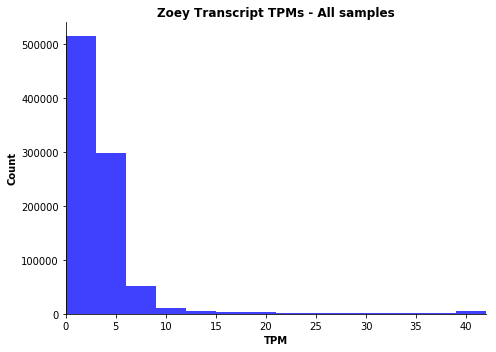

In [17]:
fig = plt.figure(figsize=(7, 5)) #Set up subplots for below distributions
ax = fig.add_subplot(111)
_ = plt.hist(counts, 14, facecolor='blue', alpha=0.75)
plt.title('Zoey Transcript TPMs - All samples',fontweight='bold')
plt.xlabel('TPM',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.xlim(0,42)
simpleaxis(ax)
plt.tight_layout()
#plt.savefig(plotFile,transparent=True) #save

# CD-HIT-EST Clustering

In [25]:
## Write commands to perform CD-HIT-EST on transcripts expressed in at least 2/42 libraries
outDir = '/home/ampend/links/kidd-lab/ampend-projects/Zoey_Genome_Project/rna-seq/Trinity_RNA-Seq_Analysis/trinity_alignments/zoey-2.3/CD-HIT-EST/'

cmdFile = open(outDir + 'scripts/' + 'CD-HIT-EST_Commands_ExpressedInAtLeast2Libraries.cmds','w')

#I generated an index file for this fasta file using samtools faidx Trinity-GG.fasta
trinityFastaIndexFile = '/home/ampend/links/kidd-lab/ampend-projects/Zoey_Genome_Project/rna-seq/Trinity_RNA-Seq_Analysis/trinity_alignments/zoey-2.3/AllLibraries_trinity/Trinity-GG.fasta.fai'

#Generated from above-- are expressed in 2+ libraries
desiredFastaFile = outfile2

#Output FASTA file of expressed in 2+ libraries 
outFasta = outfile2.replace('.txt','.fa')

#make input file
cmd = 'xargs samtools faidx %s < %s >> %s' % (trinityFastaIndexFile.replace('.fai',''),outfile2,outFasta)
print(cmd)
runCMD(cmd)



xargs samtools faidx /home/ampend/links/kidd-lab/ampend-projects/Zoey_Genome_Project/rna-seq/Trinity_RNA-Seq_Analysis/trinity_alignments/zoey-2.3/AllLibraries_trinity/Trinity-GG.fasta < /home/ampend/links/kidd-lab/ampend-projects/Zoey_Genome_Project/rna-seq/Trinity_RNA-Seq_Analysis/trinity_alignments/zoey-2.3/Kalisto/results/ExpressedInAtLeastTWOSample_KallistoTPMEstimates_TrinityTranscripts.txt >> /home/ampend/links/kidd-lab/ampend-projects/Zoey_Genome_Project/rna-seq/Trinity_RNA-Seq_Analysis/trinity_alignments/zoey-2.3/Kalisto/results/ExpressedInAtLeastTWOSample_KallistoTPMEstimates_TrinityTranscripts.fa


In [27]:
#where to write
outDir = '/home/ampend/links/kidd-lab/ampend-projects/Zoey_Genome_Project/rna-seq/Trinity_RNA-Seq_Analysis/trinity_alignments/zoey-2.3/CD-HIT-EST/results/'

cmd = 'cd-hit-est '
cmd += '-i %s ' % outFasta
cmd += '-o %sZoey-Trinity_Expressed2LibrariesOrMore_c90_n8 ' % outDir
cmd += '-c 0.90 -n 8 -M 2000 '
print(cmd)
#-o /nfs/turbo/jmkiddscr/ampend-projects/Zoey_Genome_Project/CD-HIT/results/Zoey-Trinity_c90_n8.out -c 0.90 -n 8 -M 2000' | qsub -l mem=8gb,walltime=300:00:0 -q fluxod -A jmkidd_fluxod -N Zoey_CD-HIT-EST_trinity_c90_n8 -j oe -V 


cd-hit-est -i /home/ampend/links/kidd-lab/ampend-projects/Zoey_Genome_Project/rna-seq/Trinity_RNA-Seq_Analysis/trinity_alignments/zoey-2.3/Kalisto/results/ExpressedInAtLeastTWOSample_KallistoTPMEstimates_TrinityTranscripts.fa -o /home/ampend/links/kidd-lab/ampend-projects/Zoey_Genome_Project/rna-seq/Trinity_RNA-Seq_Analysis/trinity_alignments/zoey-2.3/CD-HIT-EST/results/Zoey-Trinity_Expressed2LibrariesOrMore_c90_n8 -c 0.90 -n 8 -M 2000 


## How many transcripts expressed in at least one library are eliminated through CD-HIT-EST clustering?

#### Read in CD-HIT-EST results

In [12]:
cdHitDir = '/home/ampend/links/kidd-lab-scratch/ampend-projects/Zoey_Genome_Project/CD-HIT/results/'

inFile = cdHitDir + 'Zoey-Trinity_c95_n8.out' #95% identity

missing = []

for line in open(inFile,'r'):
    line=line.rstrip().split()
    if '>TRIN' not in line[0]:
        continue
    transcript = line[0].replace('>','')
    #cdHit95List.append(transcript)
    if transcript in tpmDict.keys():
        tpmDict[transcript][1] = 'Pass'
    else:
        missing.append(transcript)
        print(transcript)
        break
#print('%i transcripts added to list that remained after filtration of transcripts >95%% identical' % len(cdHit95List))
print('%i missing' % len(missing))



TRINITY_DN69561_c0_g1_i1
1 missing


#### How many of the expressed transcripts remain after eliminating those from the CD-HIT-EST results

In [ ]:
Pass,Fail = 0,0 

for transcript in tpmDict:
    if 'Pass' == tpmDict[transcript][1]:
        Pass+=1 
    else:
        Fail+=1
print('%i transcripts pass CD-HIT-EST 95% filtration' % Pass)
print('%i transcripts FAIL CD-HIT-EST 95% filtration' % Fail)


# UCSC TRACKS

### Define color scheme for TPMs for UCSC tracks

In [1]:
## Defining the color scheme baed on TPMs 
tpm_ranges = [(0,1),(1,10),(10,50),(50,100),(100,150),(150,200),(200,250),(250,300),(300,350),(350,1000000000000)]
colors = ['grey','black','blue','darkgreen','limegreen','orangeyellow','darkorange','red','darkred','pink']
rgb = [(166, 166, 166),(0, 0, 0),(0, 102, 0),(255, 153, 0),(0, 255, 0),(204, 153, 0),(255, 102, 0),(255, 0, 0),(153, 0, 51),(204, 0, 153)]

## Defining Paths to Trinity Outputs

In [5]:
trinBlatDir = '/home/ampend/links/kidd-lab/ampend-projects/Zoey_Genome_Project/rna-seq/Trinity_RNA-Seq_Analysis/trinity_alignments/zoey-2.3/AllLibraries_trinity/BLAT/'



In [ ]:
def make_cmap(colors, position=None, bit=False):
    '''
    make_cmap takes a list of tuples which contain RGB values. The RGB
    values may either be in 8-bit [0 to 255] (in which bit must be set to
    True when called) or arithmetic [0 to 1] (default). make_cmap returns
    a cmap with equally spaced colors.
    Arrange your tuples so that the first color is the lowest value for the
    colorbar and the last is the highest.
    position contains values from 0 to 1 to dictate the location of each color.
    '''
    import matplotlib as mpl
    import numpy as np
    bit_rgb = np.linspace(0,1,256)
    if position == None:
        position = np.linspace(0,1,len(colors))
    else:
        if len(position) != len(colors):
            sys.exit("position length must be the same as colors")
        elif position[0] != 0 or position[-1] != 1:
            sys.exit("position must start with 0 and end with 1")
    if bit:
        for i in range(len(colors)):
            colors[i] = (bit_rgb[colors[i][0]],
                         bit_rgb[colors[i][1]],
                         bit_rgb[colors[i][2]])
    cdict = {'red':[], 'green':[], 'blue':[]}
    for pos, color in zip(position, colors):
        cdict['red'].append((pos, color[0], color[0]))
        cdict['green'].append((pos, color[1], color[1]))
        cdict['blue'].append((pos, color[2], color[2]))

    cmap = mpl.colors.LinearSegmentedColormap('my_colormap',cdict,256)
    return cmap

### An example of how to use make_cmap
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(311)
### Create a list of RGB tuples
colors = [(255,0,0), (255,255,0), (255,255,255), (0,157,0), (0,0,255)] # This example uses the 8-bit RGB
### Call the function make_cmap which returns your colormap
my_cmap = make_cmap(colors, bit=True)
### Use your colormap
plt.pcolor(np.random.rand(25,50), cmap=my_cmap)
plt.colorbar()

ax = fig.add_subplot(312)
colors = [(1,1,1), (0.5,0,0)] # This example uses the arithmetic RGB
### If you are only going to use your colormap once you can
### take out a step.
plt.pcolor(np.random.rand(25,50), cmap=make_cmap(colors))
plt.colorbar()

ax = fig.add_subplot(313)
### Create an array or list of positions from 0 to 1.
position = [0, 0.3, 1]
plt.pcolor(np.random.rand(25,50), cmap=make_cmap(colors, position=position))
plt.colorbar()

plt.show()